In [59]:
#pandasをインポート
import pandas as pd

In [60]:
#csvファイルを読み込む
df = pd.read_csv('WineQT.csv')

In [61]:
#欠損値の確認
df.isnull().any(axis=0)

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
Id                      False
dtype: bool

In [62]:

df.head(9999)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


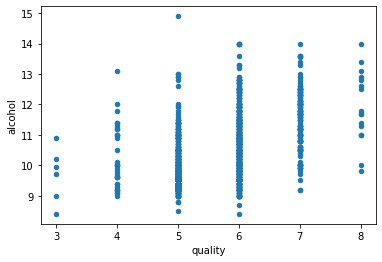

In [63]:
%matplotlib inline
df.plot(kind='scatter',x='quality',y='alcohol')

In [64]:
clear0 = df[(df['quality'] == 3)&(df['citric acid'] > 0.4)].index
clear1 = df[(df['citric acid'] > 0.8) & (df['quality'] == 4)].index
clear2 = df[(df['citric acid'] < 0.1) & (df['quality'] == 8)].index

In [65]:
df2 = df.drop(clear0,axis=0)
df2 = df2.drop(clear1,axis=0)
df2 = df2.drop(clear2,axis=0)

In [66]:
clear3 = df[(df['volatile acidity'] > 1.4) & (df['quality'] == 3)].index

In [67]:
df2 = df2.drop(clear3,axis=0)

In [68]:
clear4 = df[(df['residual sugar'] > 5) & (df['quality'] == 3)].index
clear5 = df[(df['residual sugar'] > 12) & (df['quality'] == 5)].index
clear6 = df[(df['residual sugar'] > 10) & (df['quality'] == 6)].index

In [69]:
df2 = df2.drop(clear4,axis=0)
df2 = df2.drop(clear5,axis=0)
df2 = df2.drop(clear6,axis=0)

In [70]:
clear7 = df[(df['chlorides'] > 0.25) & (df['quality'] == 5)].index
clear8 = df[(df['chlorides'] > 0.3) & (df['quality'] == 6)].index
clear9 = df[(df['chlorides'] > 0.3) & (df['quality'] == 7)].index
df2 = df2.drop(clear7,axis=0)
df2 = df2.drop(clear8,axis=0)
df2 = df2.drop(clear9,axis=0)

In [71]:
clear10 = df[(df['free sulfur dioxide'] > 60) & (df['quality'] == 5)].index
clear11 = df[(df['free sulfur dioxide'] > 40) & (df['quality'] == 8)].index
df2 = df2.drop(clear10,axis=0)
df2 = df2.drop(clear11,axis=0)

In [72]:
clear12 = df[(df['total sulfur dioxide'] > 250) & (df['quality'] == 7)].index
df2 = df2.drop(clear12,axis=0)

In [73]:
clear13 = df[(df['pH'] > 3.6) & (df['quality'] == 8)].index
df2 = df2.drop(clear13,axis=0)

In [74]:
clear14 = df[(df['alcohol'] > 14) & (df['quality'] == 5)].index
df2 = df2.drop(clear14,axis=0)

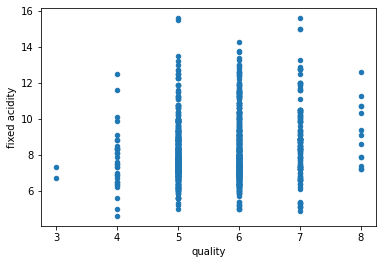

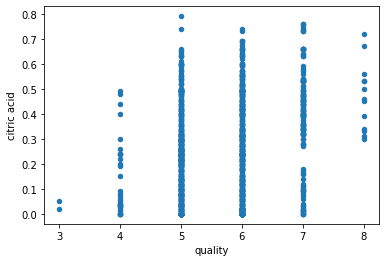

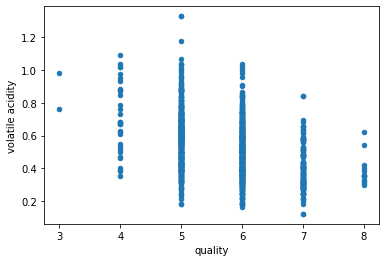

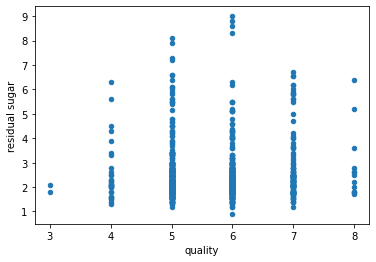

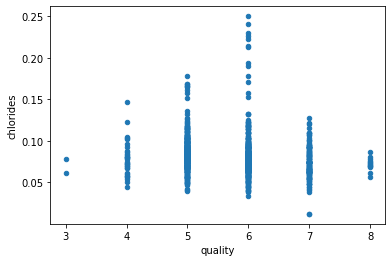

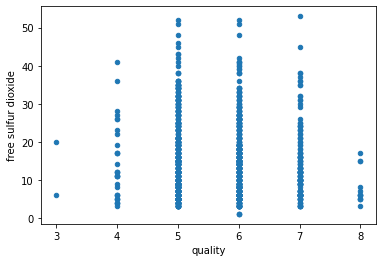

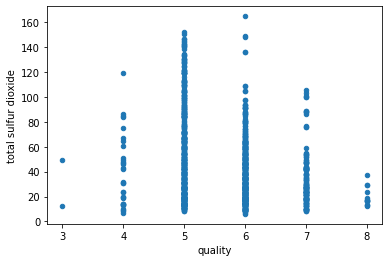

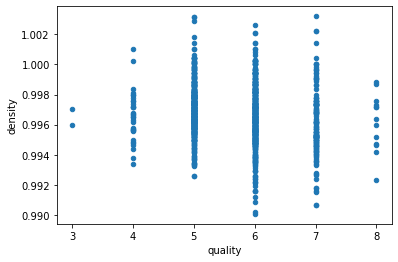

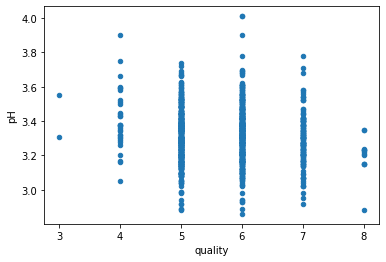

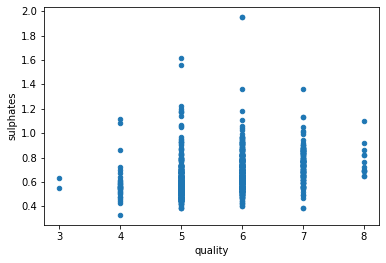

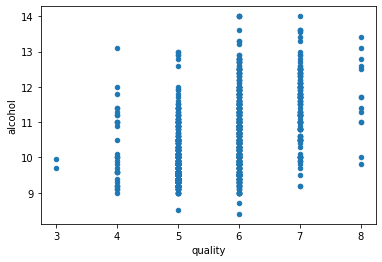

In [75]:
df2.plot(kind='scatter',x='quality',y='fixed acidity')
df2.plot(kind='scatter',x='quality',y='citric acid')
df2.plot(kind='scatter',x='quality',y='volatile acidity')
df2.plot(kind='scatter',x='quality',y='residual sugar')
df2.plot(kind='scatter',x='quality',y='chlorides')
df2.plot(kind='scatter',x='quality',y='free sulfur dioxide')
df2.plot(kind='scatter',x='quality',y='total sulfur dioxide')
df2.plot(kind='scatter',x='quality',y='density')
df2.plot(kind='scatter',x='quality',y='pH')
df2.plot(kind='scatter',x='quality',y='sulphates')
df2.plot(kind='scatter',x='quality',y='alcohol')

In [76]:
#qualityとそれ以外の各列の相関係数を、絶対値の降順に表示
train_cor = df2.corr()['quality']

# train_corの内容を表示する
train_cor
# 上記で取り出したtrain_cor(シリーズ)の各要素にabs関数を適用し、結果を変数abs_corに代入する
abs_cor = train_cor.map(abs)

# abs_corを降順に並べ替える
abs_cor.sort_values(ascending = False)

quality                 1.000000
alcohol                 0.482559
volatile acidity        0.402144
sulphates               0.319232
citric acid             0.273070
total sulfur dioxide    0.230592
fixed acidity           0.148585
density                 0.147477
chlorides               0.116911
Id                      0.078597
free sulfur dioxide     0.077933
pH                      0.073937
residual sugar          0.051362
Name: quality, dtype: float64

In [77]:
#特徴量と正解データを取り出して先頭５行を表示
x = df2.drop(["quality","residual sugar","pH","free sulfur dioxide"],axis = 1)
t = df2[['quality']]
print(x.head())
print(t.head())

   fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  Id
0            7.4              0.70         0.00  ...       0.56      9.4   0
1            7.8              0.88         0.00  ...       0.68      9.8   1
2            7.8              0.76         0.04  ...       0.65      9.8   2
3           11.2              0.28         0.56  ...       0.58      9.8   3
4            7.4              0.70         0.00  ...       0.56      9.4   4

[5 rows x 9 columns]
   quality
0        5
1        5
2        5
3        6
4        5


In [78]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
x_train, x_val, y_train, y_val = train_test_split(x, t, test_size = 0.2, random_state = 0)
print("===訓練データ特徴力")
print(len(x_train),"行")

===訓練データ特徴力
885 行


In [44]:
def learn(x, t):
    x_train, x_val, y_train, y_val = train_test_split(x, t, test_size = 0.2, random_state = 0)
    # 訓練データを標準化
    sc_model_x = StandardScaler()
    sc_model_y = StandardScaler()
    sc_model_x.fit(x_train)
    sc_x_train = sc_model_x.transform(x_train)
    sc_model_y.fit(y_train)
    sc_y_train = sc_model_y.transform(y_train)

    # 学習
    model = LinearRegression()
    model.fit(sc_x_train, sc_y_train)

    #検証データを標準化
    sc_x_val = sc_model_x.transform(x_val)
    sc_y_val = sc_model_y.transform(y_val)

    # 訓練データと検証データの決定係数計算
    train_score = model.score(sc_x_train, sc_y_train)
    val_score = model.score(sc_x_val, sc_y_val)
    return train_score, val_score

In [45]:
# # RM列 × LSTAT列 の計算結果を、新しい列'RM * LSTAT'として、特徴量xに追加する
# x['RM * LSTAT'] = x['RM'] * x['LSTAT']

# 新しい特徴量での性能を確認(learn関数を特徴量x、正解データtで呼び出す)
s1, s2 = learn(x, t)

# 結果を表示する
print('訓練データでの決定係数:',s1)
print('検証データでの決定係数:',s2)

訓練データでの決定係数: 0.38341802185120877
検証データでの決定係数: 0.33618455343546516


In [53]:
# RM列を2乗したシリーズを、新しい列'RM2'として、特徴量xに追加する
x['alcohol2'] = x['alcohol'] ** 10

# 新しい特徴量での性能を確認(learn関数を特徴量x、正解データtで呼び出す)
s1, s2 = learn(x, t)

# 結果を表示する
print('訓練データでの決定係数:',s1)
print('検証データでの決定係数:',s2)

訓練データでの決定係数: 0.3892855744732011
検証データでの決定係数: 0.34480359656938897


In [51]:
# RM列 × LSTAT列 の計算結果を、新しい列'RM * LSTAT'として、特徴量xに追加する
x['alcohol * volatile acidity'] = x['alcohol'] * x['volatile acidity']

# 新しい特徴量での性能を確認(learn関数を特徴量x、正解データtで呼び出す)
s1, s2 = learn(x, t)

# 結果を表示する
print('訓練データでの決定係数:',s1)
print('検証データでの決定係数:',s2)

訓練データでの決定係数: 0.3887720529684249
検証データでの決定係数: 0.3356745939032372


In [79]:
# 変数についての補足
# X_train ... 特徴量（訓練データ）
# y_train ... 正解データ（訓練データ）
# X_test ... 特徴量（テストデータ）
# y_test ... 正解データ（テストデータ）

# アダブースト、ベースとするモデルのライブラリのインポート
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# ベースとするモデルの生成(今回は深さ5の決定木)
base_model = DecisionTreeClassifier(random_state = 0, max_depth = 5)

# アダブーストのオブジェクトを生成(ベースとするモデルを500個使う)
model = AdaBoostClassifier(n_estimators = 500, random_state = 0, base_estimator = base_model)

# 学習
model.fit(x_train, y_train)

# 正解率表示
print( model.score(x_train, y_train) )
print( model.score(x_val, y_val) )

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.984180790960452
0.6216216216216216
